#Libraries

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Loading the dataset

In [32]:
df = pd.read_csv("/content/Mall_Customers.csv")

In [33]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [34]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [35]:
df.shape

(200, 5)

In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [37]:
df.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [38]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [60]:
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [65]:

mean=X["Age"].mean()
mean

np.float64(38.85)

In [66]:
std=X["Age"].std()
std

13.969007331558883

In [68]:
first_Age=(X["Age"][0] - mean)/std
first_Age

np.float64(-1.4210029051351942)

#Scaling

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
print("\nScaled Features (first 5 rows):")
print(X_scaled[:5])


Scaled Features (first 5 rows):
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]
 [-1.3528021  -1.70082976 -1.71591298]
 [-1.13750203 -1.70082976  1.04041783]
 [-0.56336851 -1.66266033 -0.39597992]]


#Distance between clusters

In [77]:
inertia = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

#Sihouette score

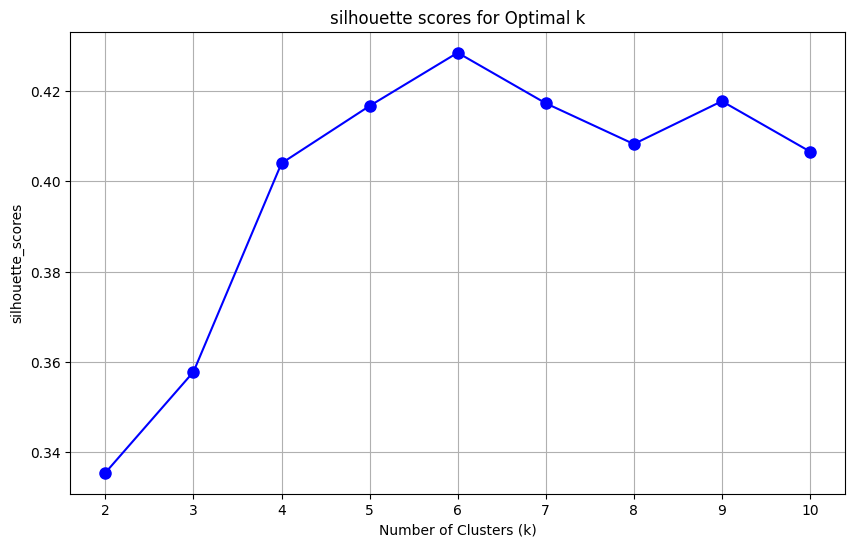

In [83]:
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('silhouette_scores')
plt.title('silhouette scores for Optimal k')
plt.grid(True)
plt.show()

#Inertia

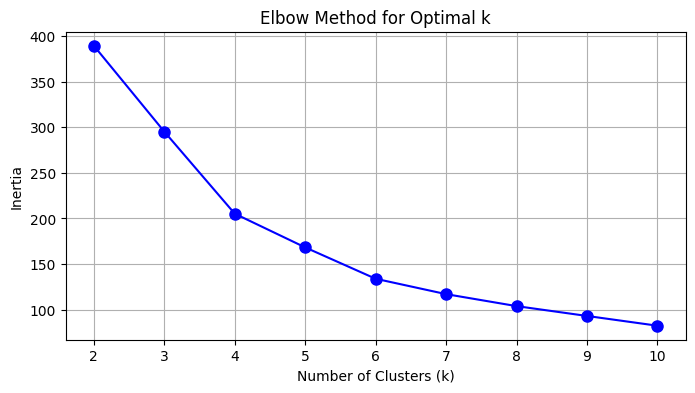

In [84]:
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [90]:

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [91]:
print("\nClustered Data Sample:")
print(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']])


Clustered Data Sample:
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        2
2     20                  16                       6        2
3     23                  16                      77        2
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        1
196   45                 126                      28        3
197   32                 126                      74        1
198   32                 137                      18        3
199   30                 137                      83        1

[200 rows x 4 columns]


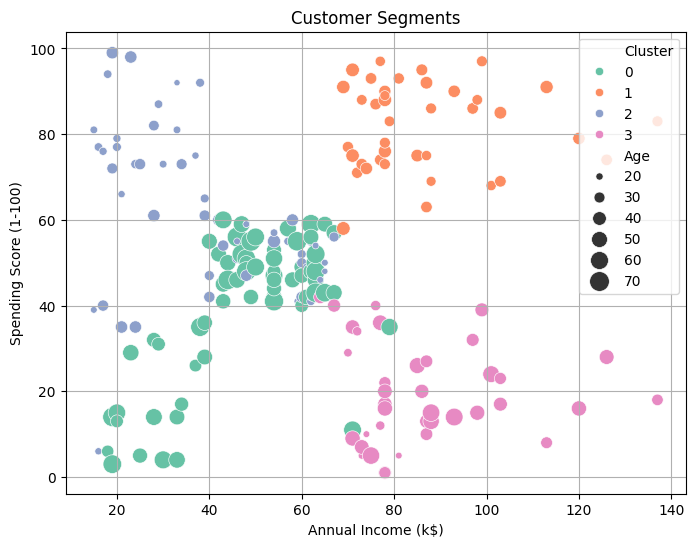

In [94]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2',size='Age', sizes=(20, 200))
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [46]:
print("\nCluster Characteristics:")
print(df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean())


Cluster Characteristics:
               Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        53.984615           47.707692               39.969231
1        32.875000           86.100000               81.525000
2        25.438596           40.000000               60.298246
3        39.368421           86.500000               19.578947


#Association Rule

#libraries

In [97]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [98]:

transactions = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'cookies'],
    ['bread', 'butter'],
    ['milk', 'bread', 'butter'],
    ['cookies', 'eggs']
]


#Encoding

In [99]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)

#converting to dataframe

In [100]:
df = pd.DataFrame(te_array, columns=te.columns_)

In [101]:
df.head()

,bread,butter,cookies,eggs,milk
0,True,False,False,True,True
1,True,False,False,False,True
2,False,False,True,False,True
3,True,True,False,False,False
4,True,True,False,False,True


#Apply the Apriori algorithm to find frequent itemsets.

In [117]:
frequent_items = apriori(df, min_support=0.3, use_colnames=True)

In [118]:
print("Frequent Itemsets:\n")
print(frequent_items)

Frequent Itemsets:

    support         itemsets
0  0.666667          (bread)
1  0.333333         (butter)
2  0.333333        (cookies)
3  0.333333           (eggs)
4  0.666667           (milk)
5  0.333333  (butter, bread)
6  0.500000    (milk, bread)


#Generate Association Rules from the frequent itemsets.

In [119]:
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.3)

In [120]:
print("Association Rules:\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])

Association Rules:

  antecedents consequents   support  confidence   lift
0    (butter)     (bread)  0.333333        1.00  1.500
1     (bread)    (butter)  0.333333        0.50  1.500
2      (milk)     (bread)  0.500000        0.75  1.125
3     (bread)      (milk)  0.500000        0.75  1.125


#Interpret the rules and write recommendations.

In [121]:
rules_output = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
print("Association Rules:\n")
for index, row in rules_output.iterrows():
    print(f"Rule {index+1}: If a customer buys {set(row['antecedents'])}, they are likely to also buy {set(row['consequents'])}")
    print(f"  Support: {row['support']:.2f}")
    print(f"  Confidence: {row['confidence']:.2f}")
    print(f"  Lift: {row['lift']:.2f}\n")

Association Rules:

Rule 1: If a customer buys {'butter'}, they are likely to also buy {'bread'}
  Support: 0.33
  Confidence: 1.00
  Lift: 1.50

Rule 2: If a customer buys {'bread'}, they are likely to also buy {'butter'}
  Support: 0.33
  Confidence: 0.50
  Lift: 1.50

Rule 3: If a customer buys {'milk'}, they are likely to also buy {'bread'}
  Support: 0.50
  Confidence: 0.75
  Lift: 1.12

Rule 4: If a customer buys {'bread'}, they are likely to also buy {'milk'}
  Support: 0.50
  Confidence: 0.75
  Lift: 1.12



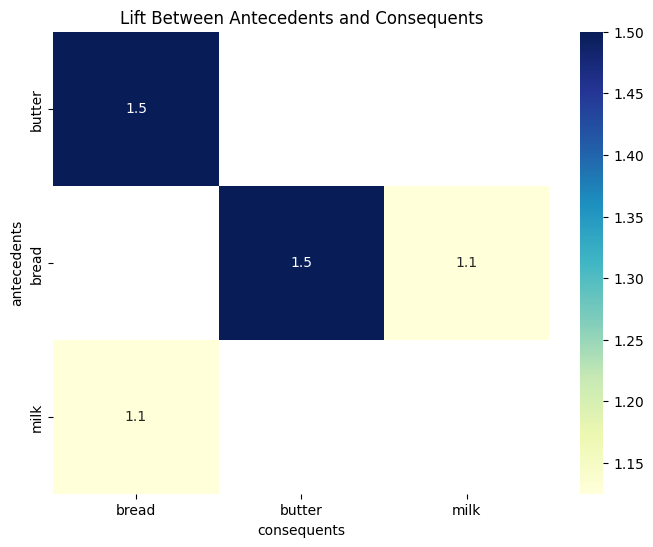

In [123]:
pivot = rules.pivot_table(index='antecedents', columns='consequents', values='lift')
pivot.index = pivot.index.map(lambda x: ', '.join(list(x)))
pivot.columns = pivot.columns.map(lambda x: ', '.join(list(x)))

plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Lift Between Antecedents and Consequents')
plt.show()